**Mobile Price Range Predictioin Project**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## ***1. Know Your Data***

In [ ]:
# Import Dataset

data=pd.read_csv("/content/drive/MyDrive/College 3 rd Sem/data_mobile_price_range.csv")

In [ ]:
# Top rows

data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
# Bottom rows

data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [ ]:
# Dimension of Dataset

rows=len(data.axes[0])

col=len(data.axes[1])

print("Number of rows is ", rows)
print("Number of columns is ", col)

Number of rows is  2000
Number of columns is  21


## ***2. Understanding Your Variables***

In [ ]:
# Dataset information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
# Duplicated Data

data.duplicated().sum()

0

*  In our Dataset there is **no** **duplicated** values are present.





In [ ]:
# Missing Values

data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

*  In our Dataset there is **no null** values.

In [ ]:
# Dataset columns

data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

**Data Description**


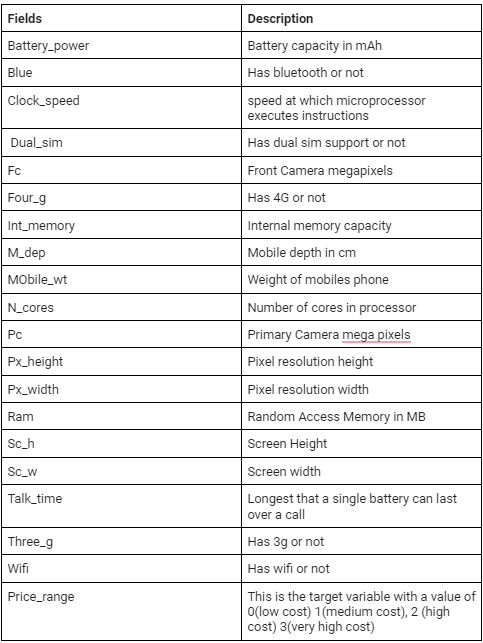

In [ ]:
# Data Describe

data.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [ ]:
# Unique Value
data.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

## ***3.Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

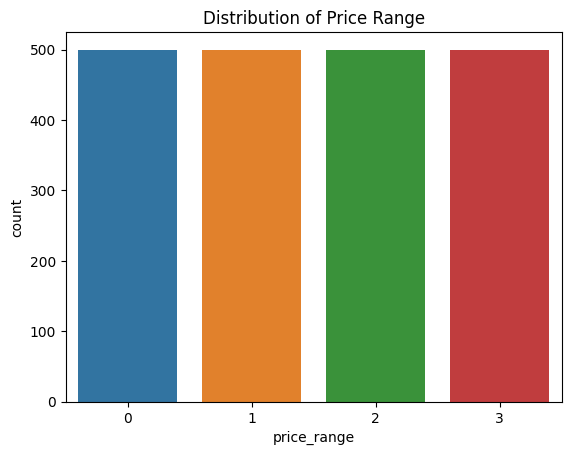

In [ ]:
# Distribution of Target Varible

sns.countplot(x=data['price_range'])
plt.title("Distribution of Price Range")
plt.show()

This is the target variable with a value of

O - low cost

1 - medium cost

2 - high cost

3 - very high cost

<Axes: ylabel='four_g'>

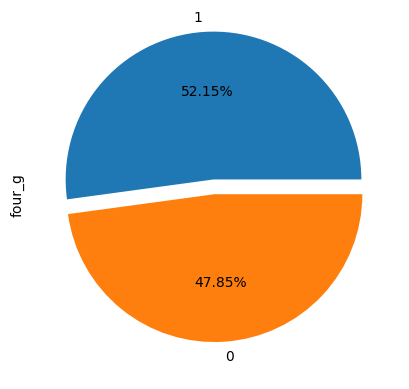

In [ ]:
# Percentage of 4 G mobiles

data['four_g'].value_counts().plot.pie(autopct='%1.2f%%',explode=[0.1,0])


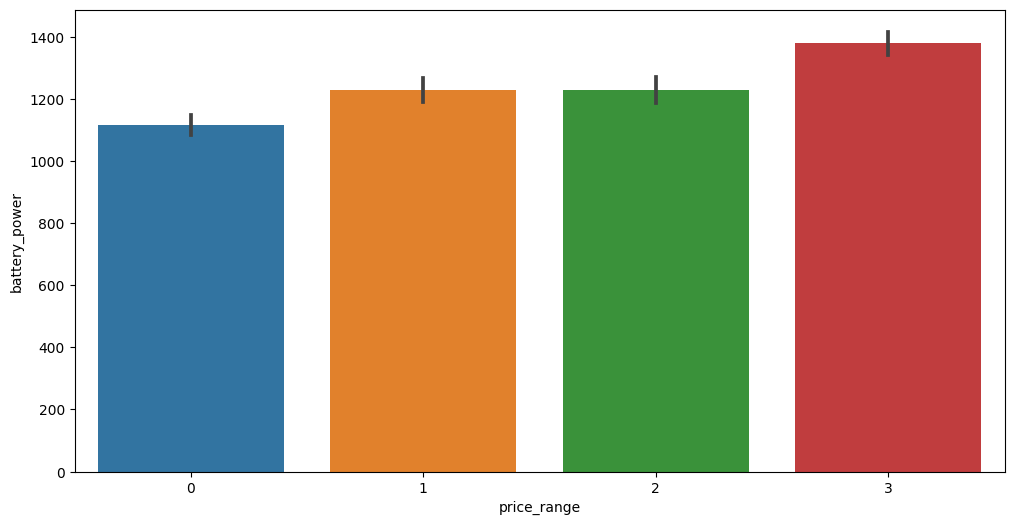

In [ ]:
# Relatioin between Price range and Battery power with the help of Bar Plot

plt.figure(figsize=(12,6))
sns.barplot(data=data,x='price_range',y='battery_power')
plt.show()

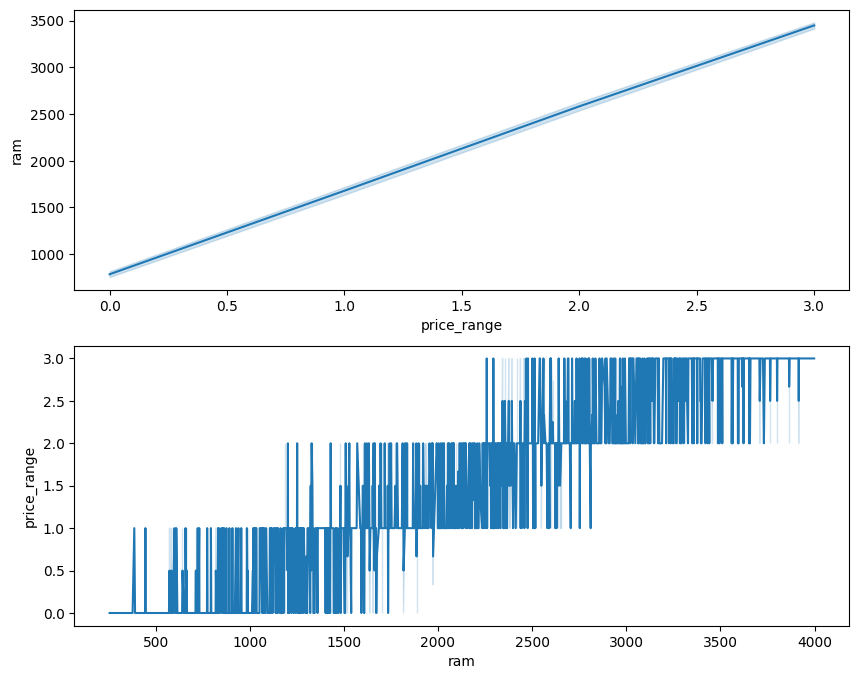

In [ ]:
# Reation between Price Range and Ram with the help of line plot

plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.lineplot(data=data,x='price_range',y='ram')
plt.subplot(2,1,2)
sns.lineplot(data=data,y='price_range',x='ram')
plt.show()

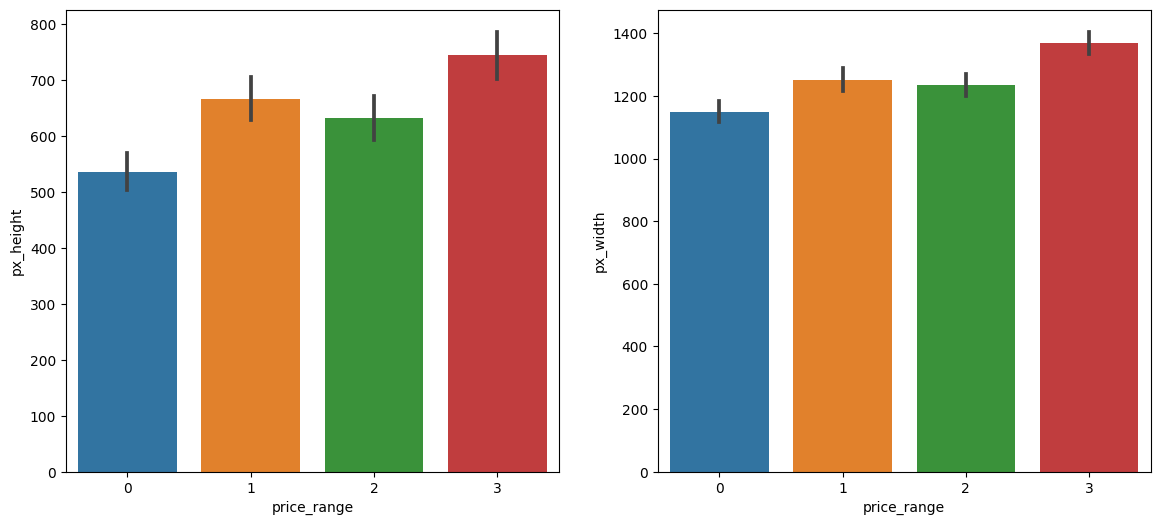

In [ ]:
# Reation between Price Range and Pixel height and width with the help of line plot

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.barplot(data=data,x='price_range',y='px_height')
plt.subplot(1,2,2)
sns.barplot(data=data,x='price_range',y='px_width')
plt.show()

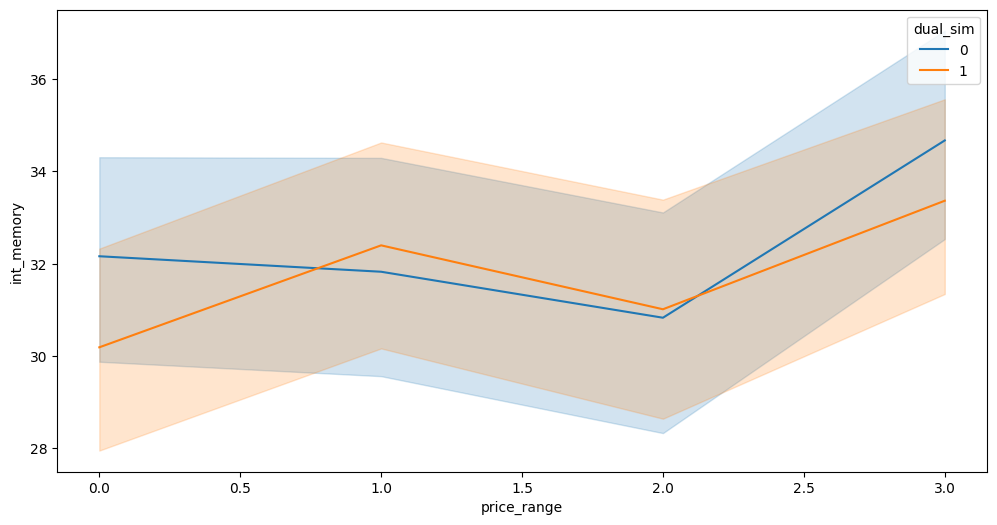

In [ ]:
# Realtionship between Price range and Memory

plt.figure(figsize=(12,6))
sns.lineplot(data=data,x='price_range',y='int_memory',hue='dual_sim')
plt.show()

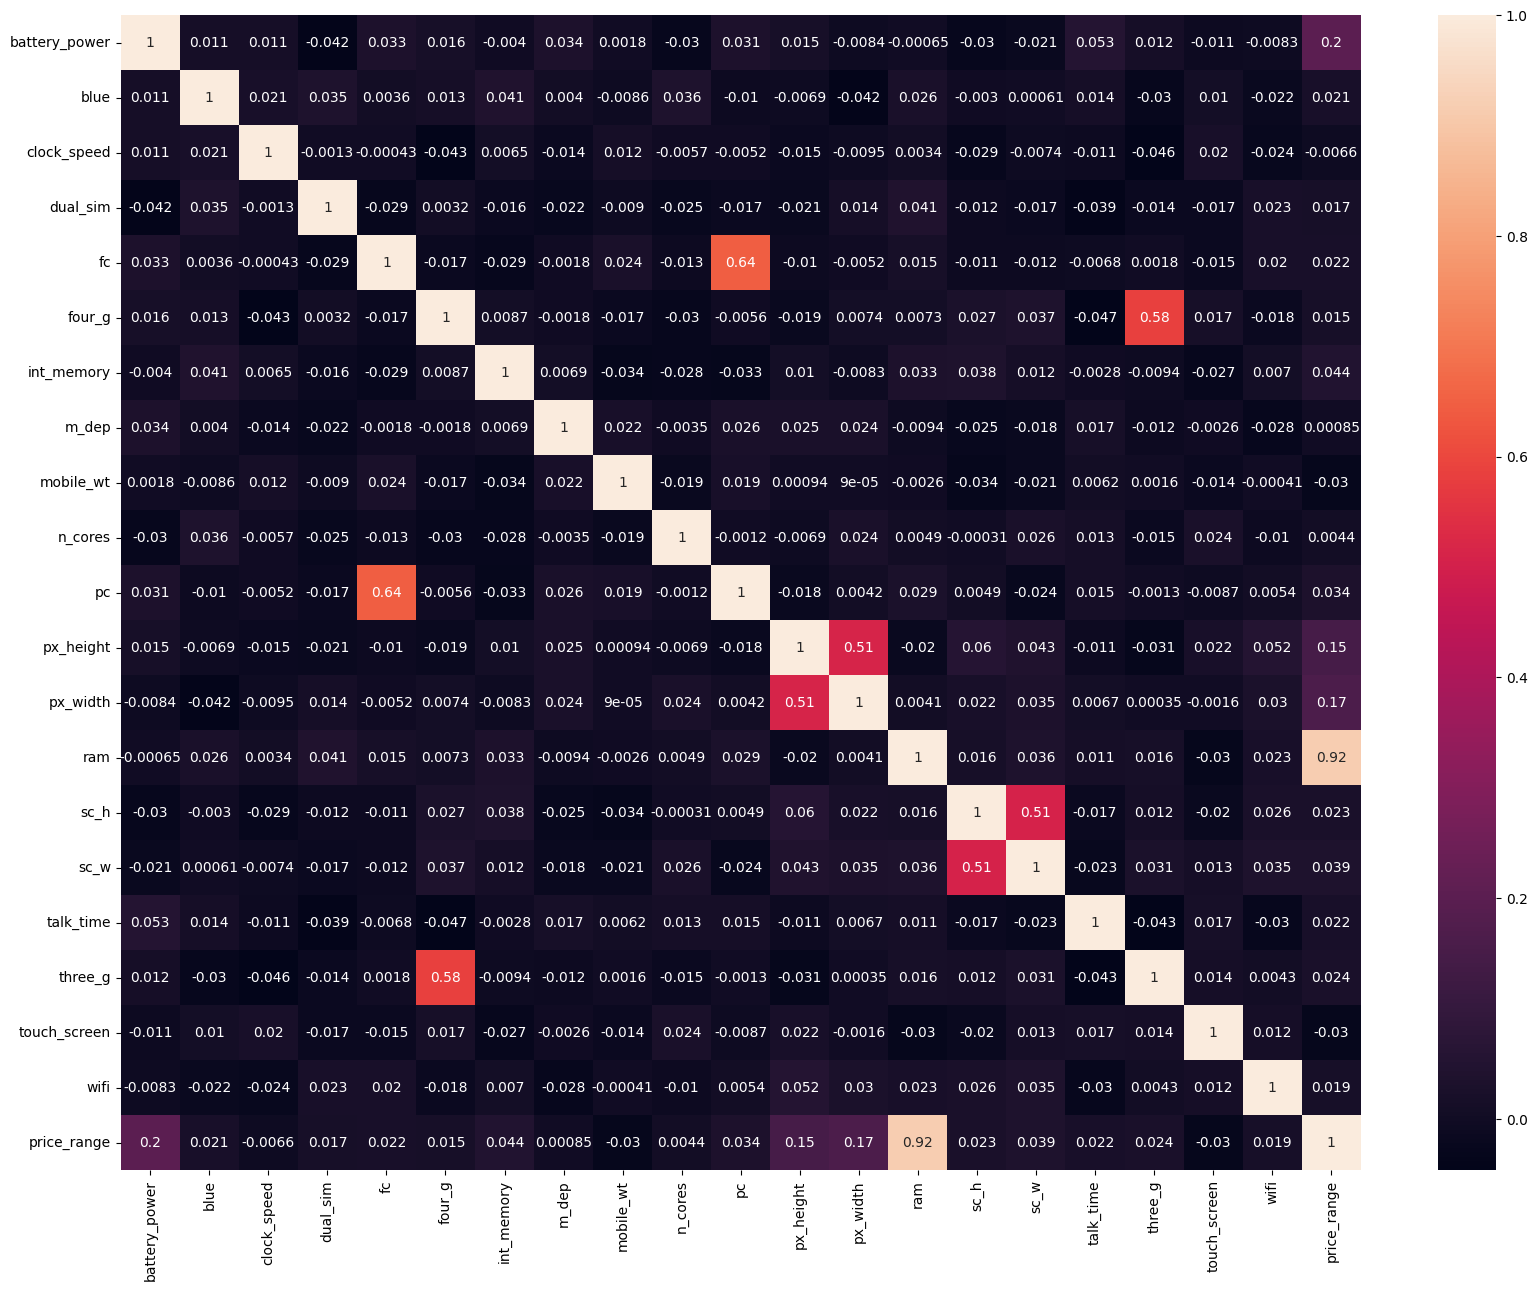

In [ ]:
# Correlatioin heatmap

plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True)
plt.show()

## 7. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

In [ ]:
# creating the set of dependent and independent variables

x = data.drop("price_range", axis=1)
y = data['price_range']

# print the shape of X and Y
print(f"Shape of X {x.shape} respectively.")
print(f"Shape of Y {y.shape} respectively.")

Shape of X (2000, 20) respectively.
Shape of Y (2000,) respectively.


In [ ]:
# splitting into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42 )

In [ ]:
 #Getting the shape of Train Test set.

print("Training Dataset Shape:--")
print("X_train shape ", x_train.shape)
print("Y_train shape ", y_train.shape)
print("Testing Dataset Shape:--")
print("X_test shape ",x_test.shape)
print("Y_test shape ",y_test.shape)

Training Dataset Shape:--
X_train shape  (1500, 20)
Y_train shape  (1500,)
Testing Dataset Shape:--
X_test shape  (500, 20)
Y_test shape  (500,)


## ***6. ML Model Implementation***

## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# Fit the model
lr_model=lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Predict on the model
test_pred_lr = lr_model.predict(x_test)

In [ ]:
# Confusion Matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, test_pred_lr)
cnf_matrix

array([[95, 36,  1,  0],
       [24, 59, 26,  9],
       [ 1, 23, 59, 37],
       [ 0,  3, 32, 95]])

In [ ]:
# Import Libraries fro accuracy,precission,recall,f1-score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score



In [ ]:
# Accuracy Score
accuracy_score(y_test,test_pred_lr)

0.616

In [ ]:
# Precision Score
precision_score(y_test,test_pred_lr, average='weighted')

0.6192516851298283

In [ ]:
# Recall Score
recall_score(y_test,test_pred_lr, average='weighted')

0.616

In [ ]:
# F1-Score
f1_score(y_test,test_pred_lr, average='weighted')

0.6168458670163861

## **K Neighbors Classifier (KNN)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

# Fit the data
knn_model=knn.fit(x_train,y_train)

In [ ]:
# Predict on the model
test_pred_lr = knn_model.predict(x_test)

In [ ]:
# Confusion Matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, test_pred_lr)
cnf_matrix

array([[126,   6,   0,   0],
       [  6, 110,   2,   0],
       [  0,   8, 107,   5],
       [  0,   0,   7, 123]])

In [ ]:
# Accuracy Score
accuracy_score(y_test,test_pred_lr)

0.932

In [ ]:
# Precision Score
precision_score(y_test,test_pred_lr, average='weighted')

0.9325778990545049

In [ ]:
# Recall Score
recall_score(y_test,test_pred_lr, average='weighted')

0.932

In [ ]:
# F1-Score
f1_score(y_test,test_pred_lr, average='weighted')

0.9320795499337085

## **Support Vectors Machine Classifier (SVM)**

In [ ]:
from sklearn.svm import SVC
svm=SVC()

# Fit the model
svm_model=svm.fit(x_train,y_train)

In [ ]:
# Predict on the model
test_pred_lr = svm_model.predict(x_test)

In [ ]:
# Confusion Matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, test_pred_lr)
cnf_matrix

array([[128,   4,   0,   0],
       [  3, 115,   0,   0],
       [  0,   6, 109,   5],
       [  0,   0,   6, 124]])

In [ ]:
# Accuracy Score
accuracy_score(y_test,test_pred_lr)

0.952

In [ ]:
# Precision Score
precision_score(y_test,test_pred_lr, average='weighted')

0.9524749399630027

In [ ]:
# Recall Score
recall_score(y_test,test_pred_lr, average='weighted')

0.952

In [ ]:
# F1-Score
f1_score(y_test,test_pred_lr, average='weighted')

0.9519436964569955

## **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=2)

# Fit the model
dtc_model=dtc.fit(x_train,y_train)

In [ ]:
# Predict on the model
test_pred_lr = dtc_model.predict(x_test)

In [ ]:
# Confusion Matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, test_pred_lr)
cnf_matrix

array([[114,  18,   0,   0],
       [ 12,  93,  13,   0],
       [  0,  14,  87,  19],
       [  0,   0,  15, 115]])

In [ ]:
# Accuracy Score
accuracy_score(y_test,test_pred_lr)

0.818

In [ ]:
# Precision Score
precision_score(y_test,test_pred_lr, average='weighted')

0.8191406886066561

In [ ]:
# Recall Score
recall_score(y_test,test_pred_lr, average='weighted')

0.818

In [ ]:
# F1-Score
f1_score(y_test,test_pred_lr, average='weighted')

0.8181615800647632

## **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=1)

# Fit the model
rfc_model=rfc.fit(x_train,y_train)

In [ ]:
# Predict on the model
test_pred_lr = rfc_model.predict(x_test)

In [ ]:
# Confusion Matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, test_pred_lr)
cnf_matrix

array([[124,   8,   0,   0],
       [  8, 104,   6,   0],
       [  0,  13,  96,  11],
       [  0,   0,  16, 114]])

In [ ]:
# Accuracy Score
accuracy_score(y_test,test_pred_lr)

0.876

In [ ]:
# Precision Score
precision_score(y_test,test_pred_lr, average='weighted')

0.8767262372881356

In [ ]:
# Recall Score
recall_score(y_test,test_pred_lr, average='weighted')

0.876

In [ ]:
# F1-Score
f1_score(y_test,test_pred_lr, average='weighted')

0.8760922640661203

## **Gradient Boosting Classifier**




In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(random_state=42)

# Fit the model
gbc_model=gbc.fit(x_train,y_train)

In [ ]:
# Predict on the model
test_pred_lr = gbc_model.predict(x_test)

In [ ]:
# Confusion Matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, test_pred_lr)
cnf_matrix

array([[123,   9,   0,   0],
       [  8, 103,   7,   0],
       [  0,  11,  98,  11],
       [  0,   0,  11, 119]])

In [ ]:
# Accuracy Score
accuracy_score(y_test,test_pred_lr)

0.886

In [ ]:
# Precision Score
precision_score(y_test,test_pred_lr, average='weighted')

0.8862624995452377

In [ ]:
# Recall Score
recall_score(y_test,test_pred_lr, average='weighted')

0.886

In [ ]:
# F1-Score
f1_score(y_test,test_pred_lr, average='weighted')

0.8859835361938733

## **Other Analysis**

**From the above Correlation heatmap graph we conclude that only few columns are correlated to each other.So for further analysis or prediction we take those columns**

### 7. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

In [ ]:
# creating the set of dependent and independent variables

x = data[['battery_power','mobile_wt','px_height','px_width','ram']]
y = data['price_range']

# print the shape of X and Y
print(f"Shape of X {x.shape} respectively.")
print(f"Shape of Y {y.shape} respectively.")

Shape of X (2000, 5) respectively.
Shape of Y (2000,) respectively.


In [ ]:
# splitting into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42 )

In [ ]:
 #Getting the shape of Train Test set.

print("Training Dataset Shape:--")
print("X_train shape ", x_train.shape)
print("Y_train shape ", y_train.shape)
print("Testing Dataset Shape:--")
print("X_test shape ",x_test.shape)
print("Y_test shape ",y_test.shape)

Training Dataset Shape:--
X_train shape  (1500, 5)
Y_train shape  (1500,)
Testing Dataset Shape:--
X_test shape  (500, 5)
Y_test shape  (500,)


## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# Fit the model
lr_model=lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Predict on the model
test_pred_lr = lr_model.predict(x_test)

In [ ]:
# Accuracy Score
accuracy_score(y_test,test_pred_lr)

0.608

In [ ]:
# Precision Score
precision_score(y_test,test_pred_lr, average='weighted')

0.610221983283003

In [ ]:
# Recall Score
recall_score(y_test,test_pred_lr, average='weighted')

0.608

In [ ]:
# F1-Score
f1_score(y_test,test_pred_lr, average='weighted')

0.6080513224407834

## **K Neighbors Classifier (KNN)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=20)

# Fit the data
knn_model=knn.fit(x_train,y_train)

In [ ]:
# Predict on the model
test_pred_lr = knn_model.predict(x_test)

In [ ]:
# Confusion Matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, test_pred_lr)
cnf_matrix

array([[129,   3,   0,   0],
       [  6, 111,   1,   0],
       [  0,  13, 104,   3],
       [  0,   0,   8, 122]])

In [ ]:
# Accuracy Score
accuracy_score(y_test,test_pred_lr)

0.932

In [ ]:
# Precision Score
precision_score(y_test,test_pred_lr, average='weighted')


0.9331793389543122

In [ ]:
# Recall Score
recall_score(y_test,test_pred_lr, average='weighted')

0.932

In [ ]:
# F1-Score
f1_score(y_test,test_pred_lr, average='weighted')

0.931979262318806

## **Support Vectors Machine Classifier (SVM)**

In [ ]:
from sklearn.svm import SVC
svm=SVC()

# Fit the model
svm_model=svm.fit(x_train,y_train)

In [ ]:
# Predict on the model
test_pred_lr = svm_model.predict(x_test)

In [ ]:
# Confusion Matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, test_pred_lr)
cnf_matrix

array([[128,   4,   0,   0],
       [  1, 117,   0,   0],
       [  0,   8, 107,   5],
       [  0,   0,   6, 124]])

In [ ]:
# Accuracy Score
accuracy_score(y_test,test_pred_lr)

0.952

In [ ]:
# Precision Score
precision_score(y_test,test_pred_lr, average='weighted')

0.9531791177882967

In [ ]:
# Recall Score
recall_score(y_test,test_pred_lr, average='weighted')

0.952

In [ ]:
# F1-Score
f1_score(y_test,test_pred_lr, average='weighted')

0.9519081896109385

## **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy',splitter='random',random_state=2)

# Fit the model
dtc_model=dtc.fit(x_train,y_train)

In [ ]:
# Predict on the model
test_pred_lr = dtc_model.predict(x_test)

In [ ]:
# Confusion Matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, test_pred_lr)
cnf_matrix

array([[115,  17,   0,   0],
       [  3, 109,   6,   0],
       [  0,  10,  97,  13],
       [  0,   0,  15, 115]])

In [ ]:
# Accuracy Score
accuracy_score(y_test,test_pred_lr)

0.872

In [ ]:
# Precision Score
precision_score(y_test,test_pred_lr, average='weighted')

0.87731708000997

In [ ]:
# Recall Score
recall_score(y_test,test_pred_lr, average='weighted')

0.872

In [ ]:
# F1-Score
f1_score(y_test,test_pred_lr, average='weighted')

0.8728443789396367

## **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(criterion='entropy',random_state=1)

# Fit the model
rfc_model=rfc.fit(x_train,y_train)

In [ ]:
# Predict on the model
test_pred_lr = rfc_model.predict(x_test)

In [ ]:
# Confusion Matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, test_pred_lr)
cnf_matrix

array([[124,   8,   0,   0],
       [  7, 109,   2,   0],
       [  0,   8, 102,  10],
       [  0,   0,   8, 122]])

In [ ]:
# Accuracy Score
accuracy_score(y_test,test_pred_lr)

0.914

In [ ]:
# Precision Score
precision_score(y_test,test_pred_lr, average='weighted')

0.9145595886454512

In [ ]:
# Recall Score
recall_score(y_test,test_pred_lr, average='weighted')

0.914

In [ ]:
# F1-Score
f1_score(y_test,test_pred_lr, average='weighted')

0.9138350177272945

## **Gradient Boosting Classifier**


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(random_state=42)

# Fit the model
gbc_model=gbc.fit(x_train,y_train)

In [ ]:
# Predict on the model
test_pred_lr = gbc_model.predict(x_test)

In [ ]:
# Confusion Matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, test_pred_lr)
cnf_matrix

array([[122,  10,   0,   0],
       [  5, 108,   5,   0],
       [  0,   9, 100,  11],
       [  0,   0,  11, 119]])

In [ ]:
# Accuracy Score
accuracy_score(y_test,test_pred_lr)

0.898

In [ ]:
# Precision Score
precision_score(y_test,test_pred_lr, average='weighted')

0.899195764322563

In [ ]:
# Recall Score
recall_score(y_test,test_pred_lr, average='weighted')

0.898

In [ ]:
# F1-Score
f1_score(y_test,test_pred_lr, average='weighted')

0.8981655613413483